# Importing Standard Libraries

In [2]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Importing Tables

In [3]:
rt_reviews_df = pd.read_csv('../Data/rt.reviews.tsv',
                           delimiter='\t',
                           encoding=('unicode_escape'))

In [4]:
tnmovie = pd.read_csv('../Data/tn.movie_budgets.csv', parse_dates = ['release_date'])

In [5]:
bom = pd.read_csv('../Data/bom.movie_gross.csv')

In [6]:
rt_movie_info = pd.read_csv('../Data/rt.movie_info.tsv',
                           delimiter = '\t')

# Importing SQL Database

In [7]:
conn = sqlite3.connect('../Data/im.db')

# List of SQL Tables

In [8]:
pd.read_sql('''
SELECT
    *
FROM
    sqlite_master

''',conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Formatting 'The Numbers' DB

In [9]:
tnmovie['worldwide_gross'] = tnmovie['worldwide_gross'].str.replace("\$|,|\.", '', regex = True).astype(int)

In [10]:
tnmovie['production_budget'] = tnmovie['production_budget'].str.replace("\$|,|\.", '', regex = True).astype(int)

# Creating 'Profit Column' from WWGross and Production Budget

In [11]:
tnmovie['profit'] = tnmovie['worldwide_gross'] - tnmovie['production_budget']

In [12]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


In [13]:
tnmovie = tnmovie.sort_values(by='profit',
                   ascending=False)

In [14]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,2351345279
42,43,1997-12-19,Titanic,200000000,"$659,363,944",2208208395,2008208395
6,7,2018-04-27,Avengers: Infinity War,300000000,"$678,815,482",2048134200,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,1747311220
33,34,2015-06-12,Jurassic World,215000000,"$652,270,625",1648854864,1433854864


In [15]:
tnmovie.shape

(5782, 7)

# Formatting Release Date to M/D format

In [16]:
tnmovie['release_date_month'] = tnmovie['release_date'].dt.strftime('%m/%d')

# Creating Release_Week, Month and Year Columns

In [17]:
tnmovie['release_week'] = tnmovie['release_date'].dt.strftime('%U')

In [18]:
tnmovie['release_month'] = tnmovie['release_date'].dt.strftime('%m')

In [19]:
tnmovie['release_year'] = tnmovie['release_date'].dt.strftime('%Y')

In [20]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_date_month,release_week,release_month,release_year
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,2351345279,12/18,50,12,2009
42,43,1997-12-19,Titanic,200000000,"$659,363,944",2208208395,2008208395,12/19,50,12,1997
6,7,2018-04-27,Avengers: Infinity War,300000000,"$678,815,482",2048134200,1748134200,04/27,16,04,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,1747311220,12/18,50,12,2015
33,34,2015-06-12,Jurassic World,215000000,"$652,270,625",1648854864,1433854864,06/12,23,06,2015


In [21]:
tnmovie = tnmovie.sort_values(by='release_week',
                   )

In [22]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_date_month,release_week,release_month,release_year
5455,56,1991-01-01,Johnny Suede,500000,"$55,000",55000,-445000,01/01,00,01,1991
5527,28,1980-01-01,Maniac,350000,"$10,000,000",10000000,9650000,01/01,00,01,1980
4819,20,1971-01-01,Escape from the Planet of the Apes,2500000,"$12,300,000",12300000,9800000,01/01,00,01,1971
2750,51,1964-01-01,The Fall of the Roman Empire,19000000,"$4,750,000",4750000,-14250000,01/01,00,01,1964
3544,45,2018-01-05,Insidious: The Last Key,10000000,"$67,745,330",167885588,157885588,01/05,00,01,2018


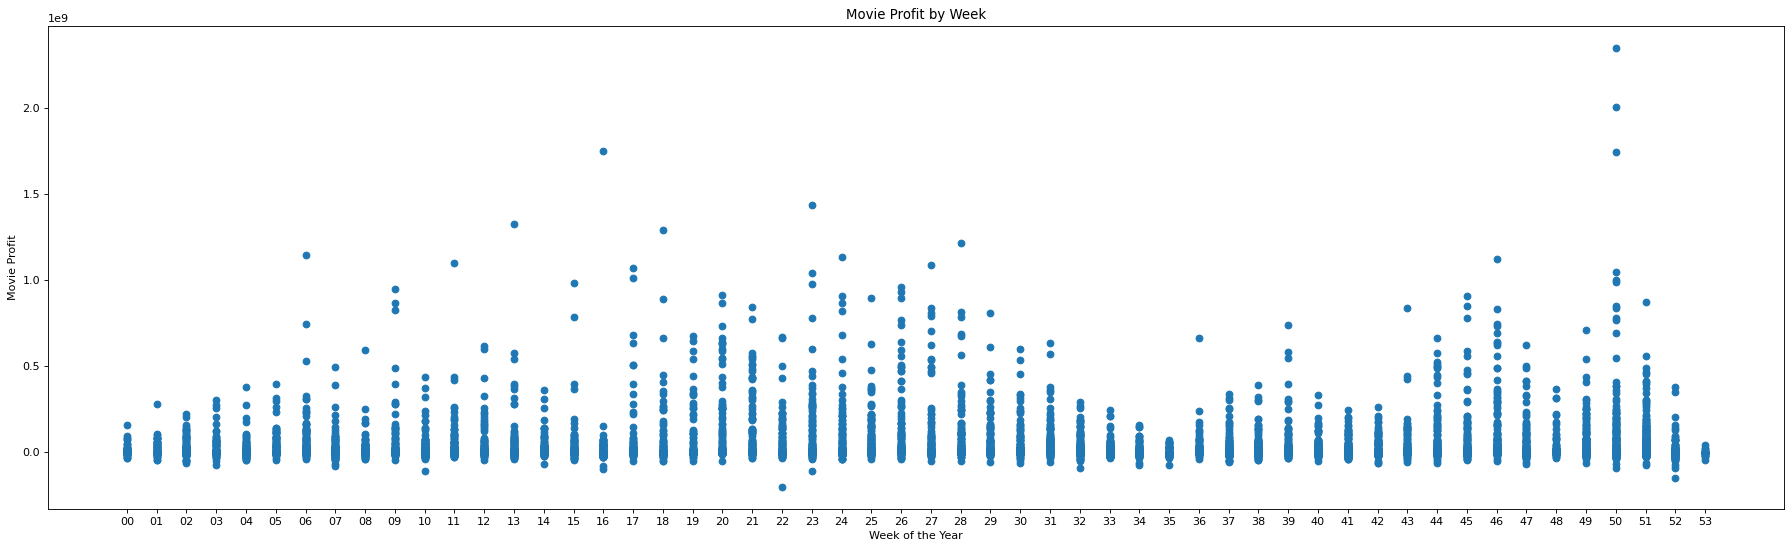

In [23]:

plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_week = plt.scatter(x = tnmovie['release_week'], y = tnmovie['profit'])
plt.title('Movie Profit by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Movie Profit')
plt.show();

Thoughts for tomorrow. Christmas 51, Thanksgiving 46, Chinese New Year 06, Late Spring 20.<br>
 Maybe could average the values for each week to make it more simple and readable.

# Import PANDASQL

In [24]:
from pandasql import sqldf

In [25]:
pysqldf = lambda q: sqldf(q, globals())

# Creation of Average Profit Weekly Column

In [26]:
q = '''SELECT release_week,
            AVG(profit) as Average_Profit_Weekly
       FROM tnmovie
       GROUP BY
           release_week;'''
tnmovies_pandas_weekly = pysqldf(q)
tnmovies_pandas_weekly

,release_week,Average_Profit_Weekly
0,00,1.311402e+07
1,01,2.283090e+07
2,02,2.988502e+07
3,03,3.245423e+07
4,04,1.914611e+07
5,05,4.449597e+07
6,06,7.565514e+07
7,07,3.091450e+07
8,08,2.520160e+07
9,09,6.997169e+07


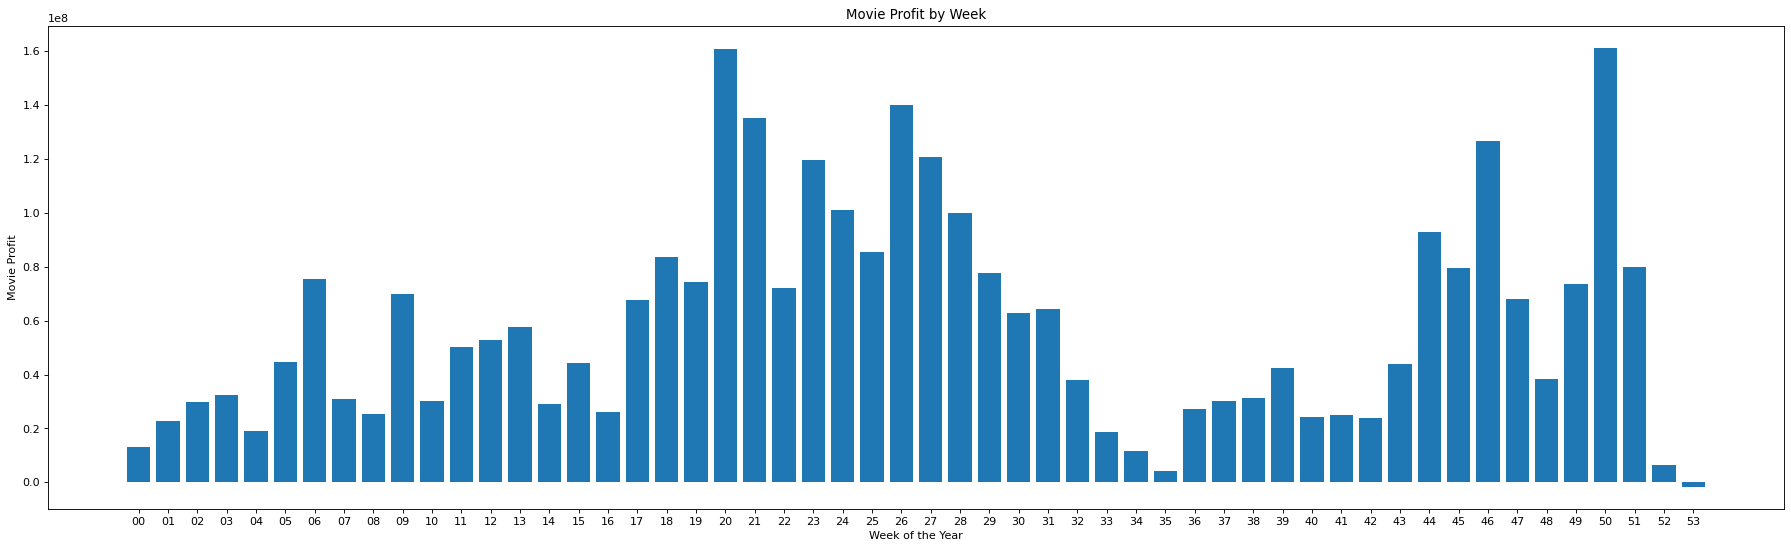

In [27]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_week = plt.bar(x = tnmovies_pandas_weekly['release_week'], height = tnmovies_pandas_weekly['Average_Profit_Weekly'])
plt.title('Movie Profit by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Movie Profit')
plt.show();

Maybe this visual would be easier read if it only contained months?

# Creation of Average Profit Monthly Column

In [28]:
q3 = '''SELECT release_month,
            AVG(profit) as Average_Profit_Monthly
       FROM tnmovie
       GROUP BY
           release_month;'''
tnmovies_pandas_monthly = pysqldf(q3)
tnmovies_pandas_monthly

,release_month,Average_Profit_Monthly
0,01,2.572033e+07
1,02,4.349811e+07
2,03,4.985129e+07
3,04,3.611743e+07
4,05,1.151328e+08
5,06,9.942391e+07
6,07,9.841746e+07
7,08,3.542232e+07
8,09,2.488078e+07
9,10,2.907190e+07


# Creation of Monthly Average Bar Graph

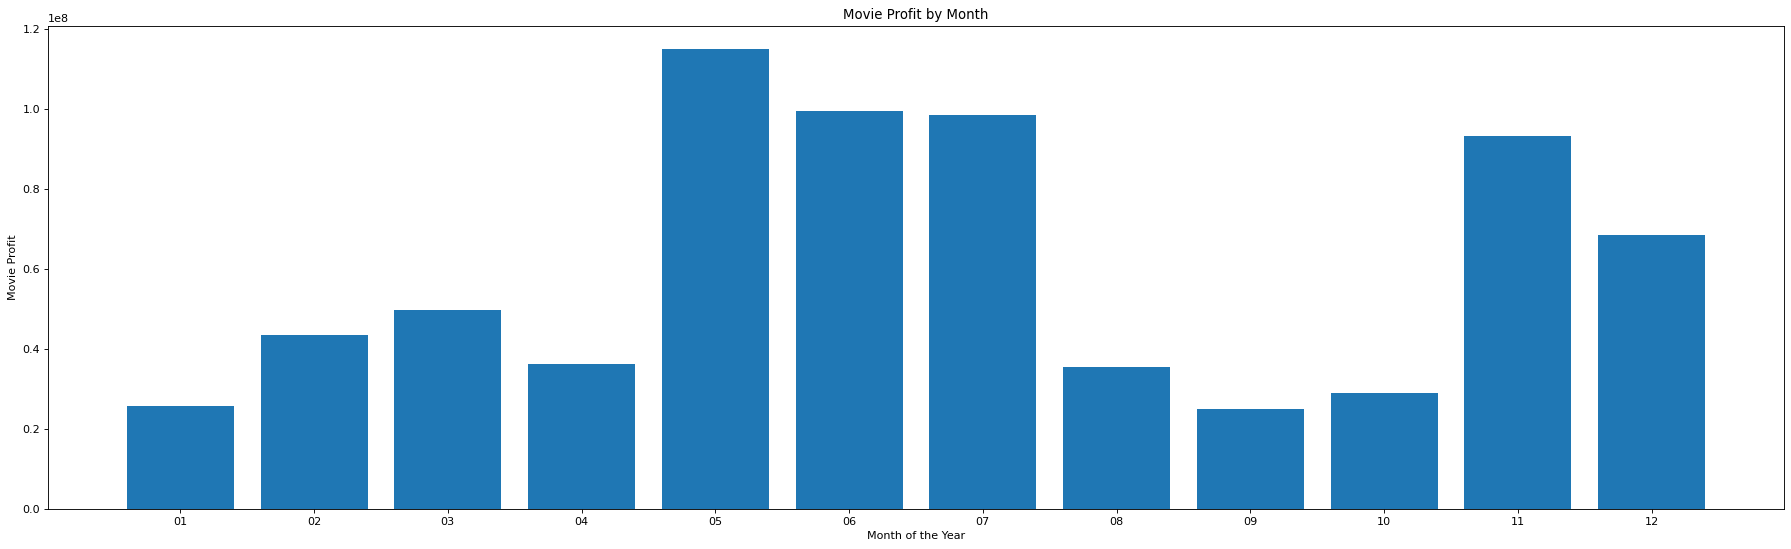

In [29]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_month = plt.bar(x = tnmovies_pandas_monthly['release_month'], height = tnmovies_pandas_monthly['Average_Profit_Monthly'])
plt.title('Movie Profit by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Movie Profit')
plt.show();

This graph is okay but starts to eliminate important data. December has the overall best release date of Christmas but then is immediately followed by the worst release days leading up to New Year and when you combine the two it hides these insights.

# Filtering to See Trends in the Last 10 Years

### Weekly data filtered by last 10 years

In [59]:
q4 = '''SELECT release_week,
            AVG(profit) as Average_Profit_Weekly,
            ROUND(AVG(profit)/1000000, 2) AS Graph_APM
       FROM tnmovie
       WHERE
            release_year > 2008       
       GROUP BY
           release_week;'''
tnmovies_pandas_weekly_10_years = pysqldf(q4)
tnmovies_pandas_weekly_10_years

,release_week,Average_Profit_Weekly,Graph_APM
0,00,3.867995e+07,38.68
1,01,3.329541e+07,33.30
2,02,4.546626e+07,45.47
3,03,4.287205e+07,42.87
4,04,3.371369e+07,33.71
5,05,4.989867e+07,49.90
6,06,1.128469e+08,112.85
7,07,6.129587e+07,61.30
8,08,1.850117e+07,18.50
9,09,1.237226e+08,123.72


### Monthly data filtered by last 10 years

In [58]:
q5 = '''SELECT release_month,
            AVG(profit) as Average_Profit_Monthly,
            ROUND(AVG(profit)/1000000, 2) AS Graph_APM
       FROM tnmovie
       WHERE
           release_year > 2008
       GROUP BY
           release_month;'''
tnmovies_pandas_monthly_10_years = pysqldf(q5)
tnmovies_pandas_monthly_10_years

,release_month,Average_Profit_Monthly,Graph_APM
0,01,4.105338e+07,41.05
1,02,6.218702e+07,62.19
2,03,6.793419e+07,67.93
3,04,5.852027e+07,58.52
4,05,1.257280e+08,125.73
5,06,1.197938e+08,119.79
6,07,1.241882e+08,124.19
7,08,4.719981e+07,47.20
8,09,3.412845e+07,34.13
9,10,4.021563e+07,40.22


In [81]:
tnmovies_pandas_monthly_10_years.head(2)

,release_month,Average_Profit_Monthly,Graph_APM
0,01,4.105338e+07,41.05
1,02,6.218702e+07,62.19


In [84]:
month_mapping = {
    '01': "January",
    '02': "February",
    '03': "March",
    '04': "April",
    '05': "May",
    '06': "June",
    '07': "July",
    '08': "August",
    '09': "September",
    '10': "October",
    '11': "November",
    '12': "December"
}

In [85]:
tnmovies_pandas_monthly_10_years['Month Title'] = tnmovies_pandas_monthly_10_years['release_month'].map(month_mapping)

In [86]:
tnmovies_pandas_monthly_10_years.head()

,release_month,Average_Profit_Monthly,Graph_APM,Month Title
0,01,4.105338e+07,41.05,January
1,02,6.218702e+07,62.19,February
2,03,6.793419e+07,67.93,March
3,04,5.852027e+07,58.52,April
4,05,1.257280e+08,125.73,May


# Creation of Weekly Release Profits Graph Filtered by Last 10 Years

### Import tick unit editor

In [166]:
from matplotlib.ticker import FormatStrFormatter

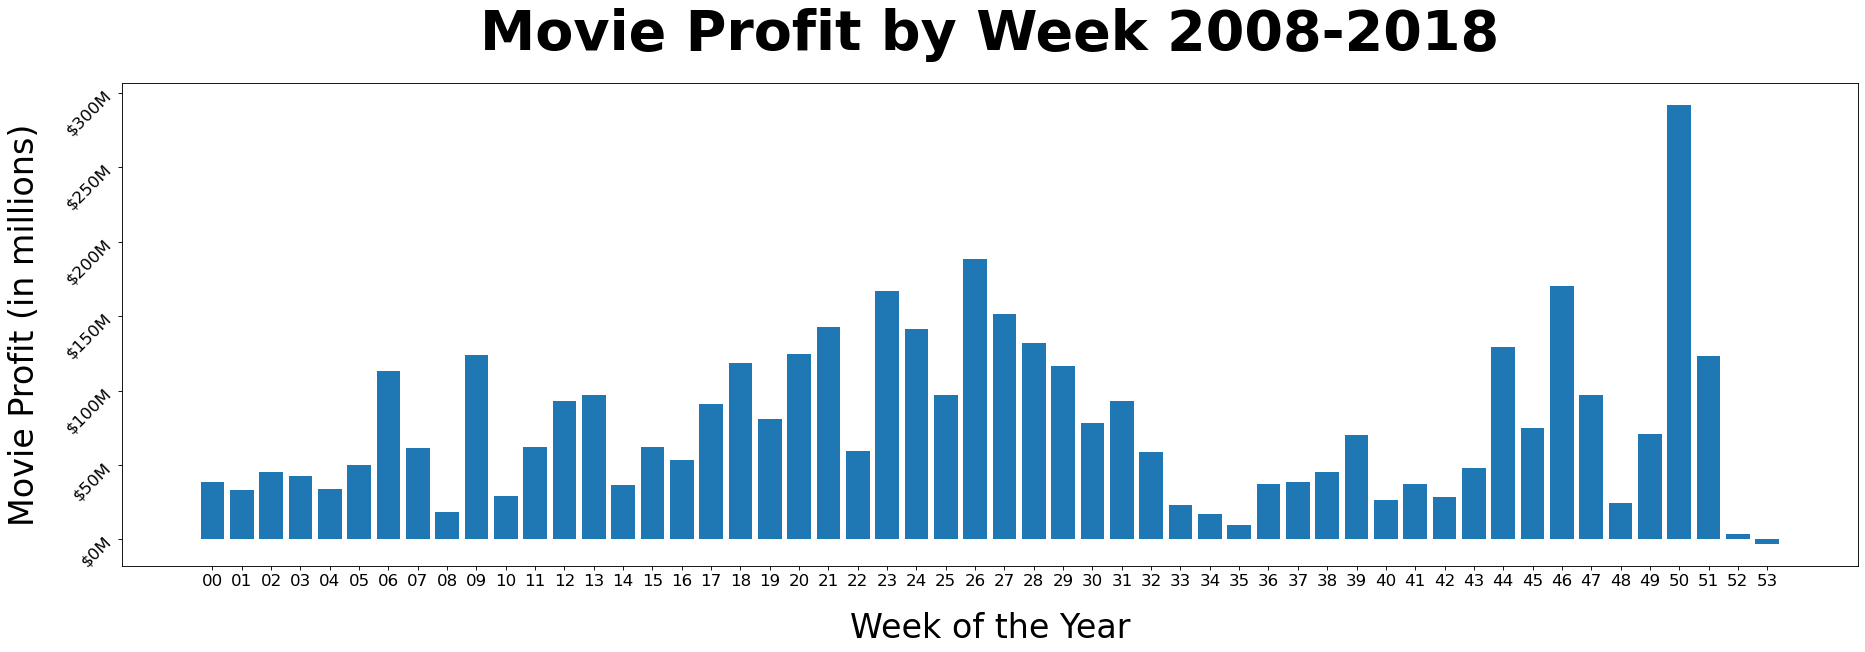

In [168]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_week_10_year = plt.bar(x = tnmovies_pandas_weekly_10_years['release_week'], height = tnmovies_pandas_weekly_10_years['Graph_APM'])

#Graph Labels
plt.title('Movie Profit by Week 2008-2018', fontsize = 50, fontweight='bold', pad = 30)
plt.xlabel('Week of the Year', fontsize = 30, labelpad = 20)
plt.ylabel('Movie Profit (in millions)', fontsize = 30, labelpad = 20)

#tick formatting
plt.ticklabel_format(axis='y', style='plain')
plt.ticklabel_format(axis='x')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15, rotation = 45)

#tick unit edit
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%dM'))
#Margin around plot
#plt.margins(.1, .1)

#Vertical Line
#plt.text(48.6, 178,'Christmas Day',rotation=90, color = 'black', fontsize = 20, fontweight='bold')
#plt.text(44.6, 188,'Thanksgiving',rotation=90, color = 'black', fontsize = 20, fontweight='bold')
#plt.axvline(x=26, ymin=0, ymax=1, color = 'lightcoral')
#plt.text(24.6, 185,'Memorial Day',rotation=90, color = 'black', fontsize = 20, fontweight='bold')
#plt.axvline(x=6, ymin=0, ymax=1, color = 'lightcoral')
#plt.text(4.6, 150,'Chinese New Year',rotation=90, color = 'black', fontsize = 20, fontweight='bold')

#plt.savefig('test.jpeg', dpi=120)
plt.show();

# Creation of Monthly Release Profits Graph Filtered by Last 10 Years

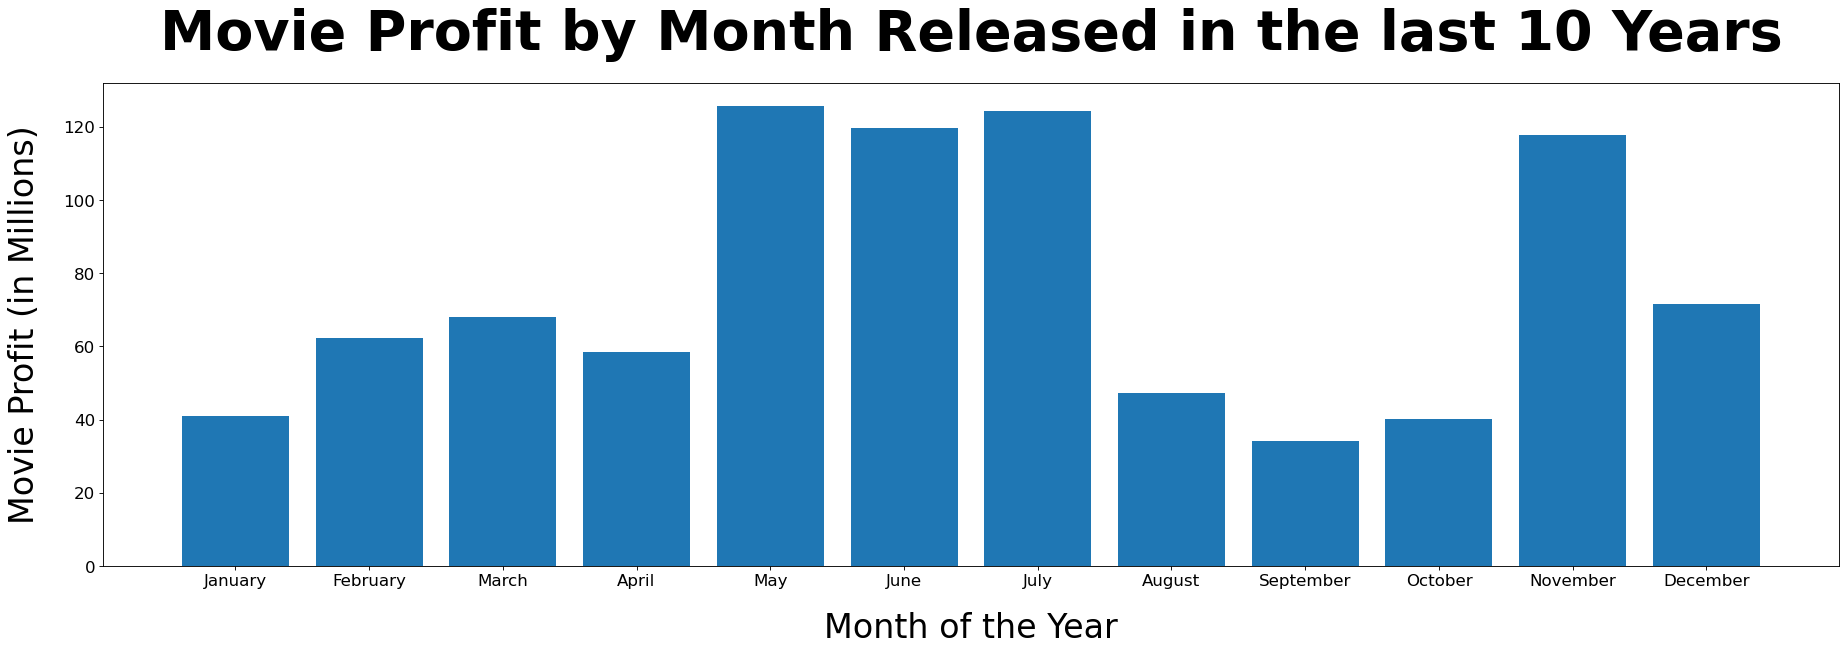

In [163]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_month_10_year = plt.bar(x = tnmovies_pandas_monthly_10_years['Month Title'], height = tnmovies_pandas_monthly_10_years['Graph_APM'])


plt.title('Movie Profit by Month Released in the last 10 Years', fontsize = 50, fontweight='bold', pad = 30)
plt.xlabel('Month of the Year', fontsize = 30, labelpad = 20)
plt.ylabel('Movie Profit (in Millions)', fontsize = 30, labelpad = 20)

plt.ticklabel_format(axis='y', style='plain')
plt.ticklabel_format(axis='x')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show();

Through these graphs we learn that release date will does have a relationship with the amount of profit a movie makes. There appear to be four days that play into this. Christmas, Thanksgiving, beginning of Summer/Spring and the Chinese New Year all seem to bring an increase in revenue.